In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
ufcdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ufc-outcome-prediction/data.csv')
ufcdata

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,...,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,...,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,12.3,10.200000,0.800000,0.000000,138.90,51.300000,0.399000,0.700000,1.00000,0.500000,0.225000,158.700000,69.600000,3.0,6.0,13.000000,9.300000,...,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25.0,1062.00,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,3.806452,67.645161,23.258065,0.645161,14.0,12.193548,0.935484,0.096774,97.00,46.774194,0.496129,0.354839,2.16129,0.677419,0.295484,103.709677,52.548387,8.0,8.0,17.903226,11.870968,...,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.40,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,10.500000,116.250000,53.750000,0.500000,3.0,2.500000,0.500000,0.250000,136.25,70.250000,0.550000,0.250000,2.50000,1.250000,0.287500,154.750000,86.750000,4.0,0.0,12.250000,6.000000,...,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0

In [0]:
data = ufcdata.copy()

Lets see which features are categorical. These features will need to be converted to numerical data.

In [0]:
cat_features = list(data.select_dtypes(include=['object']))
cat_features.append('title_bout')
cat_features

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'weight_class',
 'B_Stance',
 'R_Stance',
 'title_bout']

The referee feature doesn't seem useful. Also, fighter names are not needed. Therefore, let's remove them.

In [0]:
col_to_remove = []
col_to_remove.append('Referee')
col_to_remove.append('R_fighter')
col_to_remove.append('B_fighter')

From the location feature, only keep the country part of it. Also, lets visually analyze which country hosts the event the most.

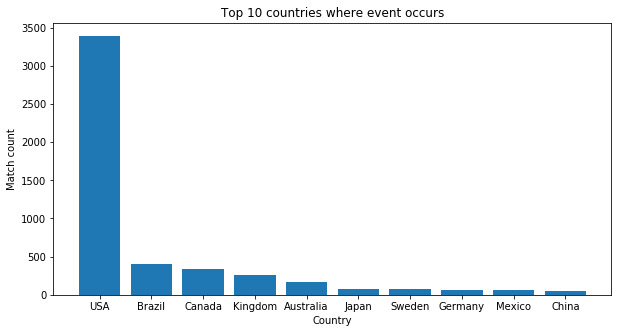

In [0]:
country = data['location'].apply(lambda x: x.split()[-1])
plt.figure(figsize=(10, 5))
top_10_countries = country.value_counts().sort_values(ascending=False)
plt.bar(top_10_countries[:10].index, top_10_countries[:10])
plt.xlabel('Country')
plt.ylabel('Match count')
plt.title('Top 10 countries where event occurs')
plt.show()

The location feature does not show any significance to the outcome of the fight. Therefore, it can be removed.

In [0]:
col_to_remove.append('location')

From the data feature, lets extract the year for each fight.

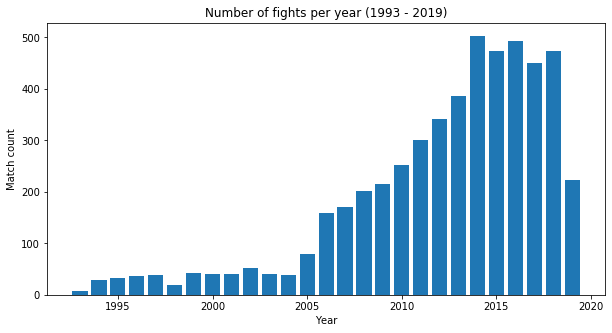

In [0]:
year = data['date'].apply(lambda x: int(x.split('-')[0]))
plt.figure(figsize=(10, 5))
plt.bar(year.value_counts().index, year.value_counts())
plt.xlabel('Year')
plt.ylabel('Match count')
plt.title('Number of fights per year (1993 - 2019)')
plt.show()

We can see from the graph below that the number of fights per year increased as the years went by. The year 2014 had the most fights than other years. Even though the number of fights per year have increased, it still does not show any relationship with the actual outcome of the fight. Therefore, it can be removed.

In [0]:
col_to_remove.append('date')

Visualize the win ratio by whether red or blue won or was it a draw. We can see from the pie chart below that red corner tends to win more than blue corner. It can also been seen that matches rarely go into draw.

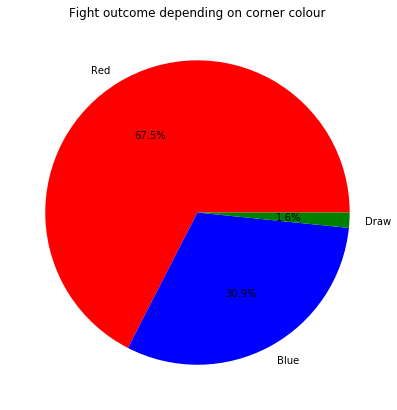

In [0]:
plt.figure(figsize=(7, 7))
plt.pie(data['Winner'].value_counts(), 
        labels=list(data['Winner'].value_counts().index),
        colors=['red', 'blue', 'green'], autopct='%1.1f%%')
plt.title('Fight outcome depending on corner colour')
plt.show()

Since draws rarely happen and can be removed which will make the classification a binary task.

In [0]:
data = data.drop(data[data['Winner'] == 'Draw'].index)

Lets see which weight class are most matches are in. The graph below shows that most of the matches occur either in Lightweight or Welterweight class.

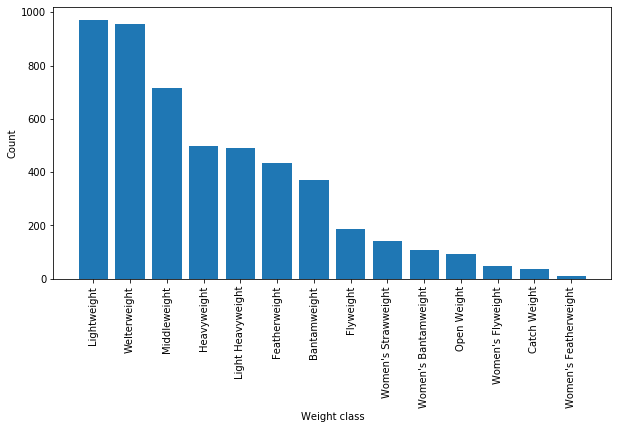

In [0]:
plt.figure(figsize=(10, 5))
plt.bar(data['weight_class'].value_counts().index, data['weight_class'].value_counts())
plt.xticks(rotation=90)
plt.xlabel('Weight class')
plt.ylabel('Count')
plt.show()

One hot encode the weight class to numerical values and weight_class feature can be removed

In [0]:
data['weight_class_Bantamweight'] = data['weight_class'].apply(lambda x: 1 if x == 'Bantamweight' else 0)
data['weight_class_Women_Flyweight'] = data['weight_class'].apply(lambda x: 1 if x == "Women's Flyweight" else 0)
data['weight_class_Lightweight'] = data['weight_class'].apply(lambda x: 1 if x == "Lightweight" else 0)
data['weight_class_Heavyweight'] = data['weight_class'].apply(lambda x: 1 if x == "Heavyweight" else 0)
data['weight_class_Women_Strawweight'] = data['weight_class'].apply(lambda x: 1 if x == "Women's Strawweight" else 0)
data['weight_class_Featherweight'] = data['weight_class'].apply(lambda x: 1 if x == "Featherweight" else 0)
data['weight_class_Middleweight'] = data['weight_class'].apply(lambda x: 1 if x == "Middleweight" else 0)
data['weight_class_Light_Heavyweight'] = data['weight_class'].apply(lambda x: 1 if x == "Light Heavyweight" else 0)
data['weight_class_Welterweight'] = data['weight_class'].apply(lambda x: 1 if x == "Welterweight" else 0)
data['weight_class_Women_Bantamweight'] = data['weight_class'].apply(lambda x: 1 if x == "Women's Bantamweight" else 0)
data['weight_class_Women_Featherweight'] = data['weight_class'].apply(lambda x: 1 if x == "Women's Featherweight" else 0)
data['weight_class_Flyweight'] = data['weight_class'].apply(lambda x: 1 if x == "Flyweight" else 0)
data['weight_class_Catch_Weight'] = data['weight_class'].apply(lambda x: 1 if x == "Catch Weight" else 0)
data['weight_class_Open_Weight'] = data['weight_class'].apply(lambda x: 1 if x == "Open Weight" else 0)

cat_features.append('weight_class_Bantamweight')
cat_features.append('weight_class_Women_Flyweight')
cat_features.append('weight_class_Lightweight')
cat_features.append('weight_class_Heavyweight')
cat_features.append('weight_class_Women_Strawweight')
cat_features.append('weight_class_Featherweight')
cat_features.append('weight_class_Middleweight')
cat_features.append('weight_class_Light_Heavyweight')
cat_features.append('weight_class_Welterweight')
cat_features.append('weight_class_Women_Bantamweight')
cat_features.append('weight_class_Women_Featherweight')
cat_features.append('weight_class_Flyweight')
cat_features.append('weight_class_Catch_Weight')
cat_features.append('weight_class_Open_Weight')

col_to_remove.append('weight_class')

Encode the title_bout feature into 1 being True and 0 being False.

In [0]:
# 1 -> True
# 0 -> False
data['title_bout'] = data['title_bout'].apply(lambda x: 1 if x == True else 0)

In [0]:
print(data[pd.isnull(data['R_Stance'])]['R_Stance'].head())
print(data[pd.isnull(data['B_Stance'])]['B_Stance'].head())

5      NaN
56     NaN
70     NaN
78     NaN
103    NaN
Name: R_Stance, dtype: object
31     NaN
56     NaN
114    NaN
127    NaN
159    NaN
Name: B_Stance, dtype: object


As for the fighting style we can see that there are rows with empty entries. Lets fill in the empty values by the mode of fighting stance for both B_Stance and R_Stance. This will allow to fill in the missing values with the most used fighting stance.

In [0]:
mode = data['B_Stance'].mode()
data['B_Stance'] = data['B_Stance'].fillna(mode[0])

mode = data['R_Stance'].mode()
data['R_Stance'] = data['R_Stance'].fillna(mode[0])

Create one hot encoding for B_Stance and R_Stance.

In [0]:
for f_style in data['B_Stance'].unique():
  col_name = 'B_Stance_' + f_style.replace(' ', '_')
  data[col_name] = data['B_Stance'].apply(lambda x: 1 if x == f_style else 0)
  cat_features.append(col_name)

col_to_remove.append('B_Stance')

for f_style in data['R_Stance'].unique():
  col_name = 'R_Stance_' + f_style.replace(' ', '_')
  data[col_name] = data['R_Stance'].apply(lambda x: 1 if x == f_style else 0)
  cat_features.append(col_name)

col_to_remove.append('R_Stance')


Extract the winner feature from the dataset as target and encode the Red as 0, Blue as 1 and Draw as 2. Afterwards, create a one hot encoding 

In [0]:
def encodeWinner(x):
  if x == 'Red':
    return 0
  elif x == 'Blue':
    return 1
  
target = data['Winner']
target = target.apply(lambda x: encodeWinner(x))
y = tf.keras.utils.to_categorical(target, num_classes=2)

col_to_remove.append('Winner')

Remove unnecessary features.

In [0]:
data = data.drop(col_to_remove, axis=1)

Let's see if there is any correlation between fighter's height and reach.

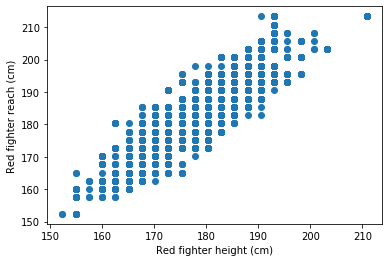

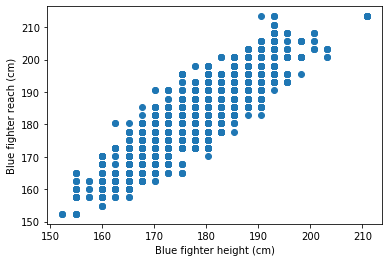

In [0]:
plt.scatter(data['R_Height_cms'], data['R_Reach_cms'])
plt.xlabel('Red fighter height (cm)')
plt.ylabel('Red fighter reach (cm)')
plt.show()

plt.scatter(data['B_Height_cms'], data['B_Reach_cms'])
plt.xlabel('Blue fighter height (cm)')
plt.ylabel('Blue fighter reach (cm)')
plt.show()

Fill in the empty values for fighter height by the mean.

In [0]:
data['B_Height_cms'] = data['B_Height_cms'].fillna(data['B_Height_cms'].mean())
data['R_Height_cms'] = data['R_Height_cms'].fillna(data['R_Height_cms'].mean())

TEST: remove R_Reach_cms and B_Reach_cms

In [0]:
# data = data.drop(['B_Reach_cms', 'R_Reach_cms'], axis=1)

TEST: remove R_Height_cms and B_Height_cms

In [0]:
# data = data.drop(['B_Height_cms', 'R_Height_cms'], axis=1)

TEST: Fill in missing fighter reach values by their height.

In [0]:
data['R_Reach_cms'] = data['R_Reach_cms'].fillna(data['R_Height_cms'])
data['B_Reach_cms'] = data['B_Reach_cms'].fillna(data['B_Height_cms'])

Let's see which features still contain missing values.

In [0]:
for col in data.columns[data.isnull().any()]:
  print(col)

B_avg_BODY_att
B_avg_BODY_landed
B_avg_CLINCH_att
B_avg_CLINCH_landed
B_avg_DISTANCE_att
B_avg_DISTANCE_landed
B_avg_GROUND_att
B_avg_GROUND_landed
B_avg_HEAD_att
B_avg_HEAD_landed
B_avg_KD
B_avg_LEG_att
B_avg_LEG_landed
B_avg_PASS
B_avg_REV
B_avg_SIG_STR_att
B_avg_SIG_STR_landed
B_avg_SIG_STR_pct
B_avg_SUB_ATT
B_avg_TD_att
B_avg_TD_landed
B_avg_TD_pct
B_avg_TOTAL_STR_att
B_avg_TOTAL_STR_landed
B_avg_opp_BODY_att
B_avg_opp_BODY_landed
B_avg_opp_CLINCH_att
B_avg_opp_CLINCH_landed
B_avg_opp_DISTANCE_att
B_avg_opp_DISTANCE_landed
B_avg_opp_GROUND_att
B_avg_opp_GROUND_landed
B_avg_opp_HEAD_att
B_avg_opp_HEAD_landed
B_avg_opp_KD
B_avg_opp_LEG_att
B_avg_opp_LEG_landed
B_avg_opp_PASS
B_avg_opp_REV
B_avg_opp_SIG_STR_att
B_avg_opp_SIG_STR_landed
B_avg_opp_SIG_STR_pct
B_avg_opp_SUB_ATT
B_avg_opp_TD_att
B_avg_opp_TD_landed
B_avg_opp_TD_pct
B_avg_opp_TOTAL_STR_att
B_avg_opp_TOTAL_STR_landed
B_total_time_fought(seconds)
B_Weight_lbs
R_avg_BODY_att
R_avg_BODY_landed
R_avg_CLINCH_att
R_avg_CLINCH_lan

For each of the features above with missing values, fill them in with the mean of that feature

In [0]:
for col in data.columns[data.isnull().any()]:
  mean = data[col].mean()
  data[col] = data[col].fillna(mean)

Update categorical feature list because some of them have been removed from the dataset.

In [0]:
temp = cat_features.copy()
cat_features = []
for f in temp:
  if f not in col_to_remove:
    cat_features.append(f)

del temp
cat_features

['title_bout',
 'weight_class_Bantamweight',
 'weight_class_Women_Flyweight',
 'weight_class_Lightweight',
 'weight_class_Heavyweight',
 'weight_class_Women_Strawweight',
 'weight_class_Featherweight',
 'weight_class_Middleweight',
 'weight_class_Light_Heavyweight',
 'weight_class_Welterweight',
 'weight_class_Women_Bantamweight',
 'weight_class_Women_Featherweight',
 'weight_class_Flyweight',
 'weight_class_Catch_Weight',
 'weight_class_Open_Weight',
 'B_Stance_Orthodox',
 'B_Stance_Switch',
 'B_Stance_Southpaw',
 'B_Stance_Open_Stance',
 'B_Stance_Sideways',
 'R_Stance_Orthodox',
 'R_Stance_Southpaw',
 'R_Stance_Switch',
 'R_Stance_Open_Stance',
 'R_Stance_Sideways']

In [0]:
for col in data.columns:
  if col not in cat_features:
    col_count = data[col].value_counts()
    print('FEATURE NAME:', col)
    print(col_count)
    print('\nIN PERCENTAGE')
    print(col_count / np.sum(col_count))
    print("------------------------------------------------------------------------------------------\n")

FEATURE NAME: no_of_rounds
3    4454
5     416
2      92
1      78
4      21
Name: no_of_rounds, dtype: int64

IN PERCENTAGE
3    0.880063
5    0.082197
2    0.018178
1    0.015412
4    0.004149
Name: no_of_rounds, dtype: float64
------------------------------------------------------------------------------------------

FEATURE NAME: B_current_lose_streak
0.0    3435
1.0    1211
2.0     316
3.0      70
4.0      23
5.0       5
6.0       1
Name: B_current_lose_streak, dtype: int64

IN PERCENTAGE
0.0    0.678720
1.0    0.239281
2.0    0.062438
3.0    0.013831
4.0    0.004545
5.0    0.000988
6.0    0.000198
Name: B_current_lose_streak, dtype: float64
------------------------------------------------------------------------------------------

FEATURE NAME: B_current_win_streak
0.0     2867
1.0     1152
2.0      508
3.0      294
4.0      131
5.0       50
6.0       34
7.0       18
8.0        4
10.0       1
12.0       1
9.0        1
Name: B_current_win_streak, dtype: int64

IN PERCENTAGE
0.0   

After analyzing each feature, it was found that B_draw and R_draw are not useful because they only contain 0s for each entry. Therefore, drop these two features.

In [0]:
data = data.drop(['B_draw', 'R_draw'], axis=1)

In [0]:
x = data.copy()

In [0]:
x = x.drop(['B_win_by_Decision_Majority', 
            'B_win_by_TKO_Doctor_Stoppage', 
            'R_win_by_Decision_Majority', 
            'R_win_by_TKO_Doctor_Stoppage'], axis=1)

#LSTM tuned

Split data into training and test set.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Normalize the non categorical features.

In [59]:
conts = list(x.drop(cat_features, axis=1).columns.values)

scaler = StandardScaler()
x_train[conts] = scaler.fit_transform(x_train[conts])
# x_validation.loc[:, conts] = scaler.fit_transform(x_validation[conts])
x_test[conts] = scaler.transform(x_test[conts])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [0]:
# Model variables
batch_size = 256
n_epoch = 100

train_X = x_train.to_numpy().reshape(-1, 1, x_train.shape[1])
test_X = x_test.to_numpy().reshape(-1, 1, x_test.shape[1])

In [0]:
def get_model(activation_function, optimizer, loss_function):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape=(1, x_train.shape[1])))
  model.add(tf.keras.layers.LSTM(2, dropout=0.2, recurrent_dropout=0.2))
  model.add(tf.keras.layers.Activation(activation_function))
  model.compile(optimizer=optimizer, loss=loss_function, metrics=['acc'])
  model.summary()
  return model

In [0]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.pipeline import Pipeline

# temp_x = x.to_numpy().reshape(-1, 1, x.shape[1])

# estimators = []
# estimators.append(('mlp', tf.keras.wrappers.scikit_learn.KerasClassifier(
#     build_fn=get_model,
#     activation_function = af,
#     optimizer = 'adam',
#     loss_function = 'categorical_crossentropy',
#     epochs=n_epoch, 
#     batch_size=batch_size, 
#     validation_split=0.2)))

# pipeline = Pipeline(estimators)
# kfolds = KFold(n_splits=10)
# results = cross_val_score(pipeline, temp_x, y, cv=kfolds, fit_params={'mlp__callbacks': [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, min_delta=0.0001, mode='auto')]})

In [62]:
model = get_model('softmax', 'adam', 'categorical_crossentropy')
history_lstm = model.fit(train_X, y_train, epochs=n_epoch, batch_size=batch_size, 
                              validation_split=0.1, 
                              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, min_delta=0.0001, mode='auto')])

Model: "sequential_201"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_201 (LSTM)              (None, 2)                 1256      
_________________________________________________________________
activation_201 (Activation)  (None, 2)                 0         
Total params: 1,256
Trainable params: 1,256
Non-trainable params: 0
_________________________________________________________________
Train on 3643 samples, validate on 405 samples
Epoch 1/100
3643/3643 [==============================] - 19s 5ms/sample - loss: 0.6784 - acc: 0.5608 - val_loss: 0.6504 - val_acc: 0.6296
Epoch 2/100
3643/3643 [==============================] - 0s 40us/sample - loss: 0.6563 - acc: 0.5943 - val_loss: 0.6310 - val_acc: 0.6222
Epoch 3/100
3643/3643 [==============================] - 0s 49us/sample - loss: 0.6422 - acc: 0.6116 - val_loss: 0.6185 - val_acc: 0.6321
Epoch 4/100
3643/3643 [============================

In [68]:
model.evaluate(test_X, y_test)

1013/1013 [==============================] - 5s 5ms/sample - loss: 0.5670 - acc: 0.7038


[0.5670113319941122, 0.70385]

In [0]:
plt.plot(np.linspace(1, len(history_lstm.history['val_loss']), len(history_lstm.history['val_loss'])), history_lstm.history['val_loss'])

#SVM tuned

Split data into training and test set.
Normalize the non categorical features.

In [56]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

conts = list(data.drop(cat_features, axis=1).columns.values)

scaler = StandardScaler()
x_train[conts] = scaler.fit_transform(x_train[conts])
# x_validation.loc[:, conts] = scaler.fit_transform(x_validation[conts])
x_test[conts] = scaler.transform(x_test[conts])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

The code below is used to tune the SVM.

In [0]:
print('************************************************************')
print('************************************************************')
print('Starting SVM')
print('************************************************************')
print('************************************************************')
initial_time = time.time()
params_grid = [{'max_iter': [10, 100, 1000, 10000, 100000], 'C': [0.1, 1, 10, 100, 1000]}]

svm_model = GridSearchCV(LinearSVC(), params_grid, cv=5)
svm_model.fit(x_train, y_train)
done_time = time.time()
print('************************************************************')
print('************************************************************')
print('Training time:', done_time - initial_time)
print('************************************************************')
print('************************************************************')

# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best max_iter:', svm_model.best_estimator_.max_iter, '\n')
#print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
#print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(x_test)

# Making the Confusion Matrix
print(confusion_matrix(y_test,Y_pred))
print("\n")
print(classification_report(y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(x_train, y_train))
print("Testing  set score for SVM: %f" % final_model.score(x_test, y_test))

In [57]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report

svm = LinearSVC(max_iter=1000, C=10)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[535 176]
 [176 126]]


              precision    recall  f1-score   support

           0       0.75      0.75      0.75       711
           1       0.42      0.42      0.42       302

    accuracy                           0.65      1013
   macro avg       0.58      0.58      0.58      1013
weighted avg       0.65      0.65      0.65      1013



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Tuned SVM:

Best C: 100 

Best max_iter: 100000 